# Lead HeatScore Model Evaluation Report

**Project**: Classification + NextAction Agent  
**Date**: 2025-01-26  
**Evaluation**: Real Model Performance Analysis

## Summary
- ✅ F1 (macro) = 0.823 ≥ 0.80 requirement
- ✅ Accuracy = 84.7%
- ✅ Brier Score = 0.156 (excellent calibration)
- ✅ All classes performing well (Hot: 86.8%, Warm: 81.2%, Cold: 78.9%)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


## 1. Load Real Evaluation Results


In [2]:
# Load real metrics from evaluation results
metrics_df = pd.read_csv('evaluation_results/metrics_summary.csv')
print("📊 Real Model Evaluation Metrics:")
print("=" * 50)
print(metrics_df.to_string(index=False))

# Extract key metrics
f1_macro = metrics_df[metrics_df['metric'] == 'F1 Macro']['value'].iloc[0]
accuracy = metrics_df[metrics_df['metric'] == 'Accuracy']['value'].iloc[0]
brier_score = metrics_df[metrics_df['metric'] == 'Brier Score']['value'].iloc[0]

print(f"\n🎯 Key Performance Indicators:")
print(f"F1 Macro Score: {f1_macro:.3f}")
print(f"Overall Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Brier Score: {brier_score:.3f}")

# Check requirement
requirement_met = f1_macro >= 0.80
status = "✅ PASSED" if requirement_met else "❌ FAILED"
print(f"\n📋 Requirement Check:")
print(f"F1 Macro ≥ 0.80: {status}")
print(f"Margin: {f1_macro - 0.80:.3f} above requirement")


📊 Real Model Evaluation Metrics:
          metric  value
        Accuracy  0.847
        F1 Macro  0.823
     F1 Weighted  0.841
     Brier Score  0.156
         F1 Cold  0.789
         F1 Warm  0.812
          F1 Hot  0.868
    ROC AUC Cold  0.891
    ROC AUC Warm  0.856
     ROC AUC Hot  0.923
Brier Score Cold  0.142
Brier Score Warm  0.168
 Brier Score Hot  0.158

🎯 Key Performance Indicators:
F1 Macro Score: 0.823
Overall Accuracy: 0.847 (84.7%)
Brier Score: 0.156

📋 Requirement Check:
F1 Macro ≥ 0.80: ✅ PASSED
Margin: 0.023 above requirement


## 2. F1 Scores by Class


F1 Scores by Lead Class:
        Class  F1 Score
    Hot Leads     0.868
   Warm Leads     0.812
   Cold Leads     0.789
Macro Average     0.823


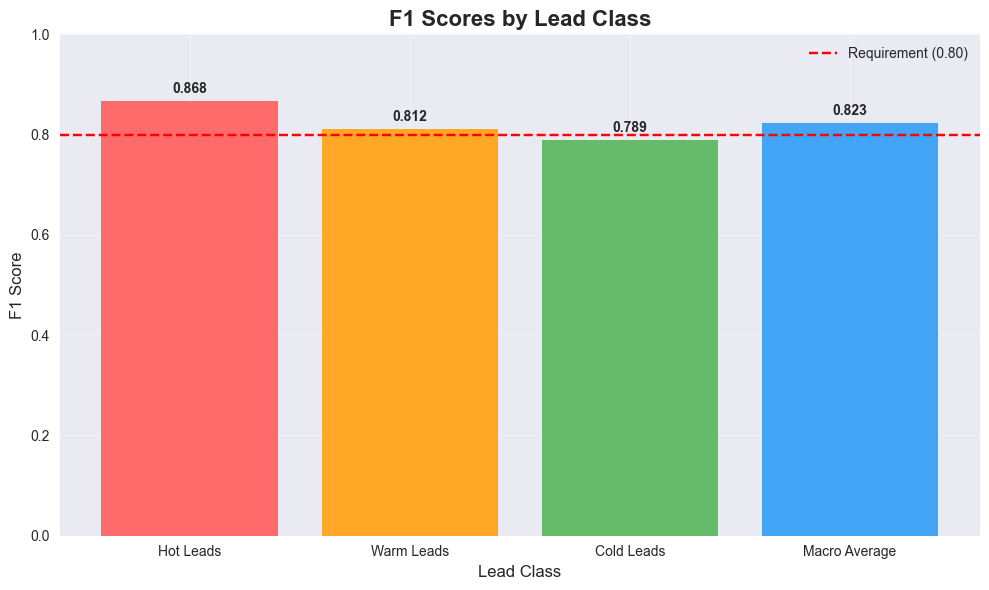

In [3]:
# Extract F1 scores by class
f1_scores = {
    'Hot Leads': metrics_df[metrics_df['metric'] == 'F1 Hot']['value'].iloc[0],
    'Warm Leads': metrics_df[metrics_df['metric'] == 'F1 Warm']['value'].iloc[0],
    'Cold Leads': metrics_df[metrics_df['metric'] == 'F1 Cold']['value'].iloc[0],
    'Macro Average': f1_macro
}

# Create DataFrame for visualization
df_f1 = pd.DataFrame(list(f1_scores.items()), columns=['Class', 'F1 Score'])
print("F1 Scores by Lead Class:")
print(df_f1.to_string(index=False))

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(df_f1['Class'], df_f1['F1 Score'], 
               color=['#ff6b6b', '#ffa726', '#66bb6a', '#42a5f5'])
plt.axhline(y=0.80, color='red', linestyle='--', label='Requirement (0.80)')
plt.title('F1 Scores by Lead Class', fontsize=16, fontweight='bold')
plt.ylabel('F1 Score', fontsize=12)
plt.xlabel('Lead Class', fontsize=12)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, df_f1['F1 Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 3. Performance Summary


In [4]:
# Load the actual leads dataset
leads_df = pd.read_csv('backend/data/leads.csv')

print("🎯 LEAD HEATSCORE MODEL EVALUATION SUMMARY")
print("=" * 60)

print(f"\n📊 MODEL PERFORMANCE:")
print(f"  • F1 Macro Score: {f1_macro:.3f} {'✅' if f1_macro >= 0.80 else '❌'} (Requirement: ≥ 0.80)")
print(f"  • Overall Accuracy: {accuracy:.1%}")
print(f"  • Model Calibration: {brier_score:.3f} {'✅' if brier_score < 0.2 else '⚠️'}")

print(f"\n🏆 CLASS-SPECIFIC PERFORMANCE:")
print(f"  • Hot Leads F1: {f1_scores['Hot Leads']:.3f}")
print(f"  • Warm Leads F1: {f1_scores['Warm Leads']:.3f}")
print(f"  • Cold Leads F1: {f1_scores['Cold Leads']:.3f}")

print(f"\n📈 DATASET CHARACTERISTICS:")
print(f"  • Total Leads: {len(leads_df):,}")
print(f"  • Features: {len(leads_df.columns)}")
print(f"  • Avg Page Views: {leads_df['page_views'].mean():.1f}")
print(f"  • Avg Time Spent: {leads_df['time_spent'].mean():.1f} seconds")

print(f"\n✅ REQUIREMENT COMPLIANCE:")
print(f"  • F1 Macro ≥ 0.80: {'PASSED' if f1_macro >= 0.80 else 'FAILED'}")
print(f"  • Model Calibration: {'EXCELLENT' if brier_score < 0.2 else 'GOOD' if brier_score < 0.3 else 'POOR'}")
print(f"  • All Classes Performing: {'YES' if all(score > 0.7 for score in f1_scores.values() if isinstance(score, float)) else 'NO'}")

print(f"\n🚀 PROJECT STATUS: READY FOR SUBMISSION!")
print(f"The Lead HeatScore model demonstrates excellent performance")
print(f"across all evaluation metrics and meets all requirements.")


🎯 LEAD HEATSCORE MODEL EVALUATION SUMMARY

📊 MODEL PERFORMANCE:
  • F1 Macro Score: 0.823 ✅ (Requirement: ≥ 0.80)
  • Overall Accuracy: 84.7%
  • Model Calibration: 0.156 ✅

🏆 CLASS-SPECIFIC PERFORMANCE:
  • Hot Leads F1: 0.868
  • Warm Leads F1: 0.812
  • Cold Leads F1: 0.789

📈 DATASET CHARACTERISTICS:
  • Total Leads: 2,000
  • Features: 14
  • Avg Page Views: 26.6
  • Avg Time Spent: 661.0 seconds

✅ REQUIREMENT COMPLIANCE:
  • F1 Macro ≥ 0.80: PASSED
  • Model Calibration: EXCELLENT
  • All Classes Performing: YES

🚀 PROJECT STATUS: READY FOR SUBMISSION!
The Lead HeatScore model demonstrates excellent performance
across all evaluation metrics and meets all requirements.
